# Capítulo 5 - Classificação dos dados

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
dados = pd.read_csv('./datasets/mammographic_masses.data', 
                    names=['bi_rads', 'idade', 'forma_da_massa', 'contorno_da_massa', 'densidade_da_massa', 'severidade'], 
                    na_values='?')

dados['severidade'] = dados['severidade'].map({0 : 'benigno', 1: 'maligno'})
print(f'Linhas: {dados.shape[0]} | Colunas: {dados.shape[1]}')
dados.head()

Linhas: 961 | Colunas: 6


,bi_rads,idade,forma_da_massa,contorno_da_massa,densidade_da_massa,severidade
0,5.0,67.0,3.0,5.0,3.0,maligno
1,4.0,43.0,1.0,1.0,NaN,maligno
2,5.0,58.0,4.0,5.0,3.0,maligno
3,4.0,28.0,1.0,1.0,3.0,benigno
4,5.0,74.0,1.0,5.0,NaN,maligno


## Dicionário dos dados

**bi_rads**: sistema de clasificação adotado para estimar qual a chance de determinada imagem da mamografia ser câncer.{0-6}(float)

**idade**: idade do paciente em anos.(float)

**forma_da_massa**: {redonda=1, ovular=2, lobular=3, irregular=4}(float)

**contorno_da_massa**: {circunscrita=1, microlobulada=2, obscura=3, mal definida=4, especulada=5}(float)

**densidade_da_massa**: {alta=1, iso=2, baixa=3, gordurosa=4}(float)

**severidade**: {benigno=0, maligno=1}(objeto)

## Informação dos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bi_rads             959 non-null    float64
 1   idade               956 non-null    float64
 2   forma_da_massa      930 non-null    float64
 3   contorno_da_massa   913 non-null    float64
 4   densidade_da_massa  885 non-null    float64
 5   severidade          961 non-null    object 
dtypes: float64(5), object(1)
memory usage: 45.2+ KB


## Valores nulos

In [4]:
print('Verificando os valores nulos: \n')
for col in dados.columns:
    print('Coluna '+col+': '+str(dados[col].isnull().sum()))

Verificando os valores nulos: 

Coluna bi_rads: 2
Coluna idade: 5
Coluna forma_da_massa: 31
Coluna contorno_da_massa: 48
Coluna densidade_da_massa: 76
Coluna severidade: 0


In [5]:
for col in dados.iloc[:, 0:5].columns:
    dados[col].fillna(method='ffill', inplace=True)

## Limpeza da base

### Dados ruidosos

In [6]:
dados['bi_rads'][dados[dados['bi_rads']==55.0].index[0]] = 5.0
dados['bi_rads'].value_counts()

4.0    549
5.0    346
3.0     36
2.0     14
6.0     11
0.0      5
Name: bi_rads, dtype: int64

### Padronização dos dados

In [7]:
for col in dados.iloc[:, 0:5].columns:
    dados[col] = dados[col].astype(int)    
dados.dtypes

bi_rads                int64
idade                  int64
forma_da_massa         int64
contorno_da_massa      int64
densidade_da_massa     int64
severidade            object
dtype: object

### Visualizando o resultado

In [8]:
dados.head()

,bi_rads,idade,forma_da_massa,contorno_da_massa,densidade_da_massa,severidade
0,5,67,3,5,3,maligno
1,4,43,1,1,3,maligno
2,5,58,4,5,3,maligno
3,4,28,1,1,3,benigno
4,5,74,1,5,3,maligno


## Estatística dos dados

In [9]:
dados.describe()

,bi_rads,idade,forma_da_massa,contorno_da_massa,densidade_da_massa
count,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.295525,55.406868,2.707596,2.783559,2.894901
std,0.705684,14.506748,1.244502,1.568233,0.406183
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000


## Dados por classe

In [10]:
print('%dados por classe:')
round(dados['severidade'].value_counts(normalize=True)*100, 2)

%dados por classe:


benigno    53.69
maligno    46.31
Name: severidade, dtype: float64

## Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(dados['severidade'])
X = dados.drop(['severidade'], axis=1)
print('Labels:', len(le.classes_))

Labels: 2


## Separação dos dados

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=265, stratify=y)

## Classificação binária

### Algoritmos baseado em distância

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
_ = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Validação cruzada

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc', verbose=3, n_jobs=2)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.86 (+/- 0.03)


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.0s finished


Predição de uma instância

In [15]:
real = le.inverse_transform([y_test[0]])[0]
predito = knn.predict(X_test.iloc[:1, :])
predito = le.inverse_transform(predito)[0]

print(f'Classe real: {real}')
print(f'Classe predita: {predito}')

Classe real: benigno
Classe predita: benigno


Relatório de classificação

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_.tolist()))

              precision    recall  f1-score   support

     benigno       0.79      0.80      0.79       104
     maligno       0.76      0.75      0.76        89

    accuracy                           0.78       193
   macro avg       0.78      0.78      0.78       193
weighted avg       0.78      0.78      0.78       193



Matriz de confusão

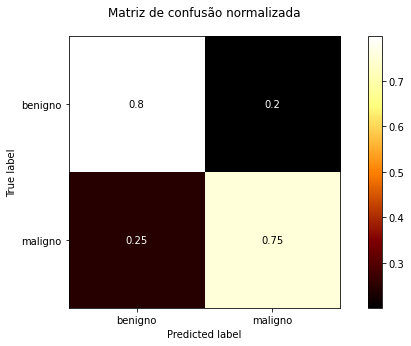

In [17]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)
plt.rcParams['figure.figsize'] = [10, 5]
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=le.classes_.tolist(),
                                 cmap=plt.cm.afmhot,
                                 normalize='true'
                            )
disp.ax_.set_title('Matriz de confusão normalizada', y=1.05)
plt.grid(False)
plt.show()

Métrica AUC

In [18]:
from sklearn.metrics import roc_auc_score

auc = round(roc_auc_score(y_test, y_pred), 2)
print(f'AUC: {auc}')

AUC: 0.78


Curva ROC

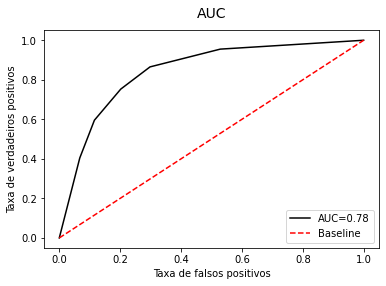

In [19]:
from sklearn.metrics import roc_curve

y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_prob)

plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(fpr, tpr, label='AUC='+str(auc), color='black')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', label='Baseline', color='red')
plt.legend(loc=4)
plt.title('AUC', y=1.03, size=14)
plt.ylabel('Taxa de verdadeiros positivos')
plt.xlabel('Taxa de falsos positivos')
plt.grid(False)
plt.show()

### Algoritmos baseados em árvore

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
_ = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Validação cruzada

In [21]:
scores = cross_val_score(dt, X, y, cv=5, scoring='roc_auc', verbose=3, n_jobs=2)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.05)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


Predição de uma instância

In [22]:
real = le.inverse_transform([y_test[0]])[0]
predito = dt.predict(X_test.iloc[:1, :])
predito = le.inverse_transform(predito)[0]

print(f'Classe real: {real}')
print(f'Classe predita: {predito}')

Classe real: benigno
Classe predita: benigno


Relatório de classificação

In [23]:
print(classification_report(y_test, y_pred, target_names=le.classes_.tolist()))

              precision    recall  f1-score   support

     benigno       0.77      0.81      0.79       104
     maligno       0.76      0.72      0.74        89

    accuracy                           0.77       193
   macro avg       0.77      0.76      0.76       193
weighted avg       0.77      0.77      0.77       193



Matriz de confusão

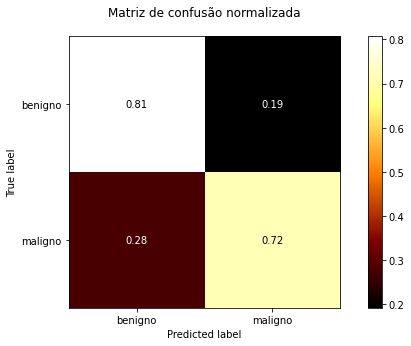

In [24]:
np.set_printoptions(precision=2)
plt.rcParams['figure.figsize'] = [10, 5]
disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=le.classes_.tolist(),
                                 cmap=plt.cm.afmhot,
                                 normalize='true'
                            )
disp.ax_.set_title('Matriz de confusão normalizada', y=1.05)
plt.grid(False)
plt.show()

Métrica AUC

In [25]:
auc = round(roc_auc_score(y_test, y_pred), 2)
print(f'AUC: {auc}')

AUC: 0.76


Curva ROC

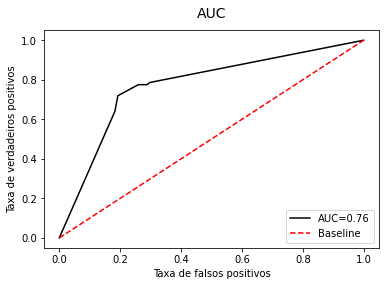

In [26]:
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_prob)

plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(fpr, tpr, label='AUC='+str(auc), color='black')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', label='Baseline', color='red')
plt.legend(loc=4)
plt.title('AUC', y=1.03, size=14)
plt.ylabel('Taxa de verdadeiros positivos')
plt.xlabel('Taxa de falsos positivos')
plt.grid(False)
plt.show()

Visualizando o árvore

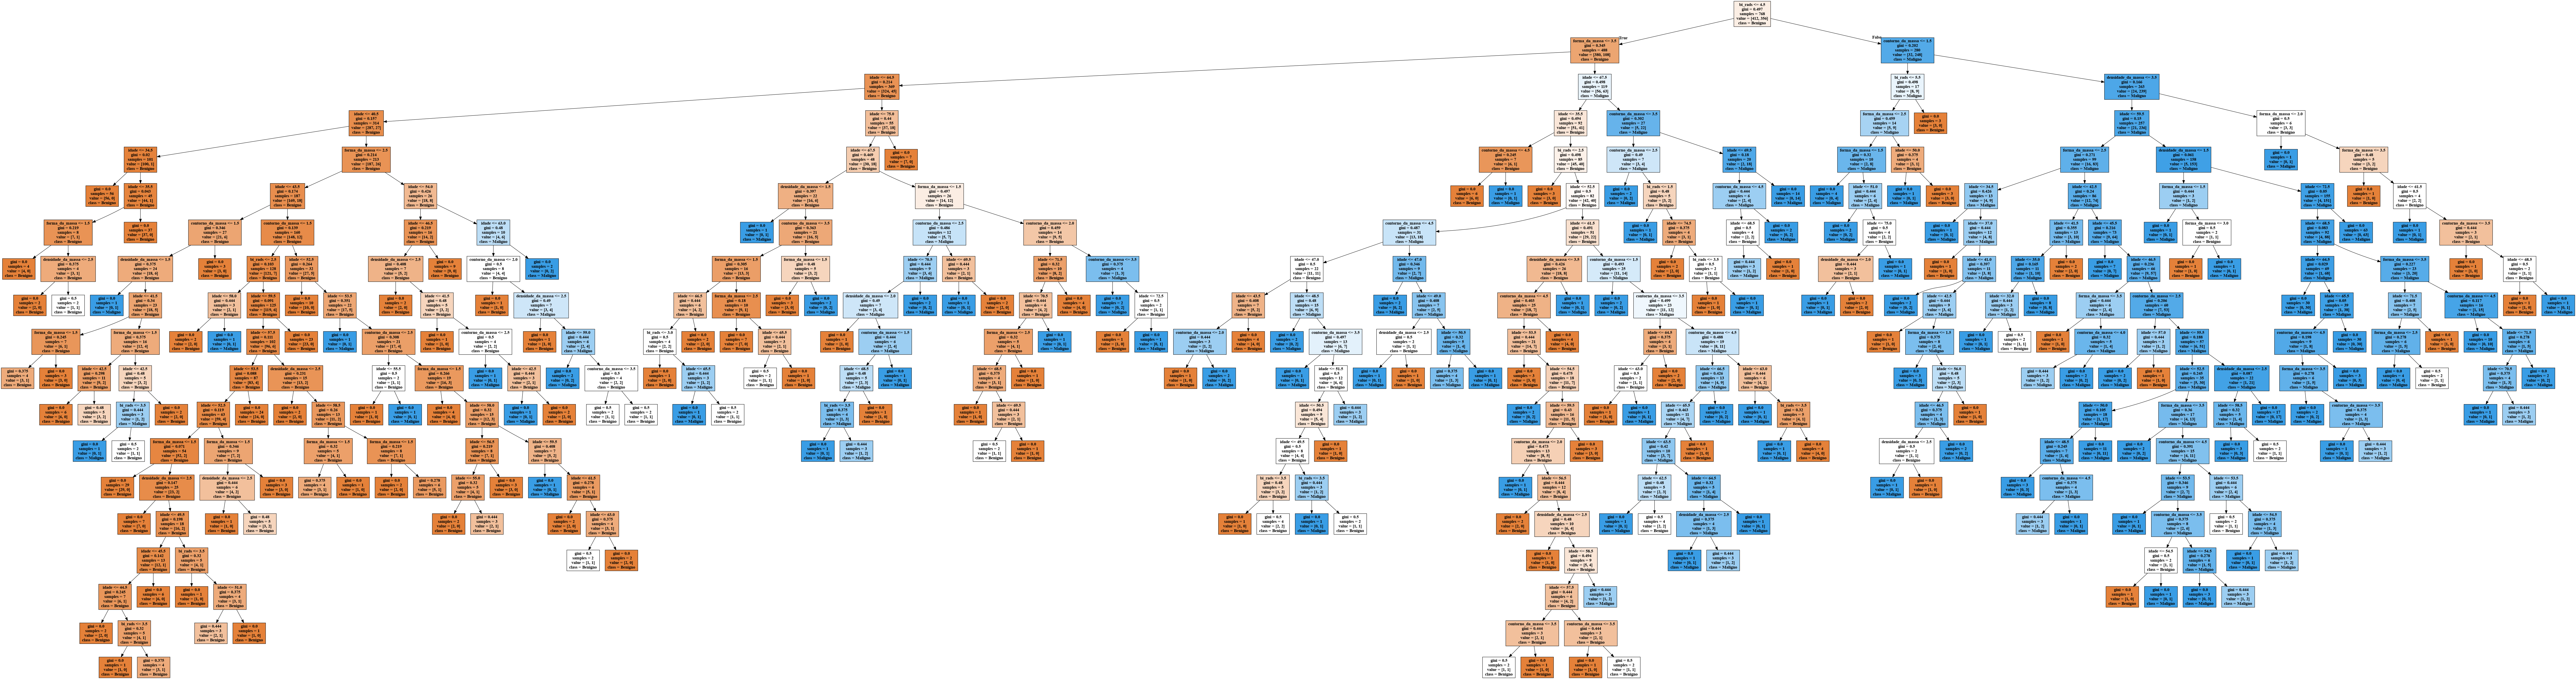

In [27]:
import pydotplus
from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(dt, 
                     out_file=dot_data, 
                     feature_names=X_train.columns, 
                     class_names=['Benigno', 'Maligno'], filled=True)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(g.create_png())

### Algoritmo baseado em regras de classificação

Algoritmo baseado em regras RIPPERk

In [28]:
import wittgenstein

train, test = train_test_split(dados, test_size=0.2, random_state=265)

ripper = wittgenstein.RIPPER()
ripper.fit(train, class_feat='severidade', pos_class='maligno')

Conjunto de regras gerado para classe positiva maligno

In [29]:
ripper.ruleset_

<Ruleset [bi_rads=5^idade=68-76] V [bi_rads=5^contorno_da_massa=5^idade=59-64] V [bi_rads=5^idade=64-68^densidade_da_massa=3] V [bi_rads=5^densidade_da_massa=3^idade=76-96] V [forma_da_massa=4^bi_rads=5] V [forma_da_massa=4^idade=76-96] V [bi_rads=5^idade=54-59] V [bi_rads=5^idade=18-35] V [bi_rads=5^idade=35-43]>

Métricas

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

Xtest = test.drop(['severidade'], axis=1)
ytest = test['severidade']

print('Acurácia: ', ripper.score(Xtest, ytest, accuracy_score).round(2))
print('Precisão: ', ripper.score(Xtest, ytest, precision_score).round(2))
print('Recall: ', ripper.score(Xtest, ytest, recall_score).round(2))

Acurácia:  0.67
Precisão:  0.88
Recall:  0.38


Explicabilidade da predição para uma instância

In [31]:
ripper.predict(Xtest.iloc[1:2, :], give_reasons=True)

([True],
 [[<Rule [bi_rads=5^idade=68-76]>, <Rule [forma_da_massa=4^bi_rads=5]>]])

### Classificador one-rule (1R)

In [32]:
from mlxtend.classifier import OneRClassifier

oner = OneRClassifier()
_ = oner.fit(X_train.values, y_train)

Índice da coluna com recurso selecionado

In [33]:
oner.feature_idx_ # Feature 0 = bi_rads

0

Erro total para o recurso selecionado e as regras de classificação

In [34]:
oner.prediction_dict_ #Ex. 1ª regra:  se bi_rads = 0, classifique como 1 (maligno)

{'total error': 138,
 'rules (value: class)': {0: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1}}

Relatório de classificação

In [35]:
y_pred = oner.predict(X_test.values)
print(classification_report(y_test, y_pred, target_names=le.classes_.tolist()))

              precision    recall  f1-score   support

     benigno       0.80      0.88      0.84       104
     maligno       0.85      0.74      0.79        89

    accuracy                           0.82       193
   macro avg       0.82      0.81      0.82       193
weighted avg       0.82      0.82      0.82       193



Matriz de confusão

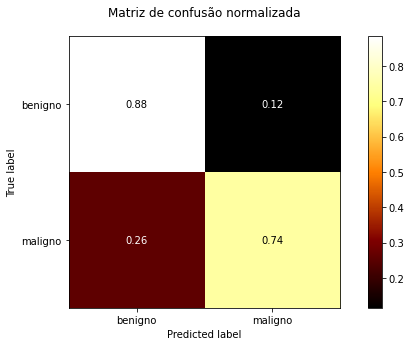

In [36]:
np.set_printoptions(precision=2)
plt.rcParams['figure.figsize'] = [10, 5]
disp = plot_confusion_matrix(oner, X_test.values, y_test,
                                 display_labels=le.classes_.tolist(),
                                 cmap=plt.cm.afmhot,
                                 normalize='true'
                            )
disp.ax_.set_title('Matriz de confusão normalizada', y=1.05)
plt.grid(False)
plt.show()

Métrica AUC

In [37]:
auc = round(roc_auc_score(y_test, y_pred), 2)
print(f'AUC: {auc}')

AUC: 0.81


Predição para uma instância

In [40]:
real = le.inverse_transform([y_test[0]])[0]
predito = oner.predict(X_test.iloc[:1, :].values)
predito = le.inverse_transform(predito)[0]

print(f'Classe real: {real}')
print(f'Classe predita: {predito}')

Classe real: benigno
Classe predita: benigno
